In [14]:
from sklearn.model_selection import train_test_split
from IPython.display import Image
from pathlib import Path
import shutil
import os

In [9]:
input_dir = Path("/kaggle/input/dataset/paper_dataset") 
output_dir = Path("/kaggle/working/dataset")

for class_dir in input_dir.iterdir():
    images = list(class_dir.glob("*.[jJ][pP][gG]")) + list(class_dir.glob("*.[pP][nN][gG]"))
    
    train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)
    
    for split, imgs in zip(["train", "val"], [train_imgs, val_imgs]):
        dest_dir = output_dir / split / class_dir.name
        dest_dir.mkdir(parents=True, exist_ok=True)
        for img in imgs:
            shutil.copy(img, dest_dir / img.name)

In [11]:
!pip install ultralytics

In [12]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [13]:
model = YOLO("yolo11m-cls")

result = model.train(
    data='/kaggle/working/dataset',
    epochs=300,
    imgsz=320, 
    optimizer='AdamW',

    degrees=10,
    shear=5,
    batch=32,

    save=True,
    plots=True,
    name='pepper_cls_model',
)

100%|██████████| 22.4M/22.4M [00:00<00:00, 112MB/s] 


Ultralytics 8.3.108 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=classify, mode=train, model=yolo11m-cls.pt, data=/kaggle/working/dataset, epochs=300, time=None, patience=100, batch=32, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=pepper_cls_model, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

E0000 00:00:1744717397.083359      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744717397.138906      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 112MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/dataset/train... 1451 images, 0 corrupt: 100%|██████████| 1451/1451 [00:00<00:00, 3027.36it/s]

train: New cache created: /kaggle/working/dataset/train.cache



val: Scanning /kaggle/working/dataset/val... 365 images, 0 corrupt: 100%|██████████| 365/365 [00:00<00:00, 1727.26it/s]

val: New cache created: /kaggle/working/dataset/val.cache


optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 49 weight(decay=0.0), 50 weight(decay=0.0005), 50 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 4 dataloader workers
Logging results to runs/classify/pepper_cls_model
Starting training for 300 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/300         3G     0.9648         32        320:   7%|▋         | 3/46 [00:01<00:13,  3.30it/s]

      1/300         3G     0.7893         32        320:  11%|█         | 5/46 [00:01<00:10,  3.81it/s]
100%|██████████| 755k/755k [00:00<00:00, 27.7MB/s]
      1/300         3G     0.4622         11        320: 100%|██████████| 46/46 [00:11<00:00,  4.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.65it/s]

                   all      0.142          1



      Epoch    GPU_mem       loss  Instances       Size


      2/300       3.4G     0.6126         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.10it/s]


                   all      0.663          1

      Epoch    GPU_mem       loss  Instances       Size


      3/300      3.41G     0.8916         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.11it/s]

                   all      0.562          1



      Epoch    GPU_mem       loss  Instances       Size


      4/300      3.41G     0.7409         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.06it/s]

                   all      0.723          1



      Epoch    GPU_mem       loss  Instances       Size


      5/300      3.41G      1.422         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.01it/s]

                   all      0.729          1



      Epoch    GPU_mem       loss  Instances       Size


      6/300      3.41G     0.6352         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.12it/s]

                   all        0.6          1



      Epoch    GPU_mem       loss  Instances       Size


      7/300      3.41G     0.5723         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.18it/s]


                   all      0.759          1

      Epoch    GPU_mem       loss  Instances       Size


      8/300      3.41G     0.6214         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.17it/s]


                   all      0.748          1

      Epoch    GPU_mem       loss  Instances       Size


      9/300      3.41G     0.5348         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.20it/s]


                   all      0.726          1

      Epoch    GPU_mem       loss  Instances       Size


     10/300      3.41G     0.4607         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.70it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


     11/300      3.41G     0.4477         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.10it/s]

                   all      0.567          1



      Epoch    GPU_mem       loss  Instances       Size


     12/300      3.41G     0.4264         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.19it/s]


                   all      0.548          1

      Epoch    GPU_mem       loss  Instances       Size


     13/300      3.41G     0.8824         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.00it/s]

                   all      0.844          1



      Epoch    GPU_mem       loss  Instances       Size


     14/300      3.41G     0.3996         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.12it/s]

                   all      0.951          1



      Epoch    GPU_mem       loss  Instances       Size


     15/300      3.41G     0.3747         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.11it/s]

                   all      0.838          1



      Epoch    GPU_mem       loss  Instances       Size


     16/300      3.41G     0.4948         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.00it/s]

                   all      0.759          1



      Epoch    GPU_mem       loss  Instances       Size


     17/300      3.41G     0.5632         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.13it/s]

                   all      0.786          1



      Epoch    GPU_mem       loss  Instances       Size


     18/300      3.41G     0.4859         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.07it/s]

                   all      0.836          1



      Epoch    GPU_mem       loss  Instances       Size


     19/300      3.41G     0.4196         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.08it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     20/300      3.41G      0.417         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.15it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     21/300      3.41G     0.3725         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.92it/s]

                   all       0.91          1



      Epoch    GPU_mem       loss  Instances       Size


     22/300      3.41G     0.3315         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.05it/s]

                   all      0.942          1



      Epoch    GPU_mem       loss  Instances       Size


     23/300      3.41G     0.3192         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.11it/s]

                   all      0.942          1



      Epoch    GPU_mem       loss  Instances       Size


     24/300      3.41G     0.3275         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.06it/s]


                   all      0.868          1

      Epoch    GPU_mem       loss  Instances       Size


     25/300      3.41G      0.305         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.01it/s]

                   all      0.915          1



      Epoch    GPU_mem       loss  Instances       Size


     26/300      3.41G     0.2545         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.10it/s]

                   all      0.926          1



      Epoch    GPU_mem       loss  Instances       Size


     27/300      3.41G     0.2637         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.08it/s]

                   all      0.951          1



      Epoch    GPU_mem       loss  Instances       Size


     28/300      3.41G     0.2388         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.10it/s]


                   all      0.967          1

      Epoch    GPU_mem       loss  Instances       Size


     29/300      3.41G     0.2303         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.03it/s]

                   all      0.942          1



      Epoch    GPU_mem       loss  Instances       Size


     30/300      3.41G     0.2873         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.97it/s]

                   all      0.729          1



      Epoch    GPU_mem       loss  Instances       Size


     31/300      3.41G     0.3084         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.14it/s]

                   all      0.926          1



      Epoch    GPU_mem       loss  Instances       Size


     32/300      3.41G     0.3008         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.16it/s]

                   all      0.948          1



      Epoch    GPU_mem       loss  Instances       Size


     33/300      3.41G      0.226         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.03it/s]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


     34/300      3.41G     0.2226         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.97it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     35/300      3.41G     0.1892         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.93it/s]

                   all      0.956          1



      Epoch    GPU_mem       loss  Instances       Size


     36/300      3.41G     0.1833         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.98it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     37/300      3.41G     0.1832         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.17it/s]


                   all      0.973          1

      Epoch    GPU_mem       loss  Instances       Size


     38/300      3.41G     0.1795         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.19it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     39/300      3.41G      0.151         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.05it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     40/300      3.41G     0.1685         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.07it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


     41/300      3.41G     0.1977         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.21it/s]


                   all      0.956          1

      Epoch    GPU_mem       loss  Instances       Size


     42/300      3.41G      0.146         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.07it/s]

                   all      0.962          1



      Epoch    GPU_mem       loss  Instances       Size


     43/300      3.41G     0.1887         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.15it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


     44/300      3.41G     0.1318         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.04it/s]

                   all      0.962          1



      Epoch    GPU_mem       loss  Instances       Size


     45/300      3.41G     0.1689         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.15it/s]


                   all      0.978          1

      Epoch    GPU_mem       loss  Instances       Size


     46/300      3.41G     0.1984         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.08it/s]


                   all      0.959          1

      Epoch    GPU_mem       loss  Instances       Size


     47/300      3.41G     0.1809         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.08it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


     48/300      3.41G     0.1536         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.16it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     49/300      3.41G     0.1854         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.15it/s]


                   all      0.962          1

      Epoch    GPU_mem       loss  Instances       Size


     50/300      3.41G     0.1991         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.10it/s]

                   all      0.877          1



      Epoch    GPU_mem       loss  Instances       Size


     51/300      3.41G     0.1859         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.00it/s]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


     52/300      3.41G     0.1548         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.22it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


     53/300      3.41G     0.1493         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.10it/s]

                   all      0.956          1



      Epoch    GPU_mem       loss  Instances       Size


     54/300      3.41G     0.1492         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.12it/s]


                   all      0.962          1

      Epoch    GPU_mem       loss  Instances       Size


     55/300      3.41G      0.143         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.16it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     56/300      3.41G     0.1636         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.10it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     57/300      3.41G     0.1345         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.83it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


     58/300      3.41G     0.1375         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.04it/s]


                   all      0.951          1

      Epoch    GPU_mem       loss  Instances       Size


     59/300      3.41G     0.1495         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.17it/s]

                   all      0.921          1



      Epoch    GPU_mem       loss  Instances       Size


     60/300      3.41G     0.1744         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.13it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     61/300      3.41G     0.1808         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.95it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


     62/300      3.41G     0.1656         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.09it/s]

                   all      0.942          1



      Epoch    GPU_mem       loss  Instances       Size


     63/300      3.41G     0.1661         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.17it/s]


                   all       0.97          1

      Epoch    GPU_mem       loss  Instances       Size


     64/300      3.41G     0.1307         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.08it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


     65/300      3.41G     0.1547         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.97it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     66/300      3.41G     0.1376         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.07it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     67/300      3.41G     0.1178         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.96it/s]

                   all      0.942          1



      Epoch    GPU_mem       loss  Instances       Size


     68/300      3.41G     0.1411         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.08it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


     69/300      3.41G     0.1408         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.10it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


     70/300      3.41G     0.1562         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.13it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


     71/300      3.41G     0.1275         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.09it/s]

                   all      0.959          1



      Epoch    GPU_mem       loss  Instances       Size


     72/300      3.41G     0.1561         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.18it/s]


                   all      0.981          1

      Epoch    GPU_mem       loss  Instances       Size


     73/300      3.41G     0.2876         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.08it/s]

                   all      0.852          1



      Epoch    GPU_mem       loss  Instances       Size


     74/300      3.41G     0.2016         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.02it/s]

                   all      0.948          1



      Epoch    GPU_mem       loss  Instances       Size


     75/300      3.41G     0.1958         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.05it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


     76/300      3.41G     0.1943         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.17it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     77/300      3.41G     0.1872         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.13it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     78/300      3.41G     0.1792         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.14it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     79/300      3.41G     0.1564         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.14it/s]


                   all      0.975          1

      Epoch    GPU_mem       loss  Instances       Size


     80/300      3.41G     0.1802         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.17it/s]


                   all      0.964          1

      Epoch    GPU_mem       loss  Instances       Size


     81/300      3.41G      0.156         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.15it/s]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


     82/300      3.41G     0.1656         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.74it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     83/300      3.41G     0.1691         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.07it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


     84/300      3.41G     0.1605         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.01it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     85/300      3.41G     0.1433         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.09it/s]

                   all      0.959          1



      Epoch    GPU_mem       loss  Instances       Size


     86/300      3.41G     0.1381         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.17it/s]

                   all      0.959          1



      Epoch    GPU_mem       loss  Instances       Size


     87/300      3.41G     0.1356         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.13it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


     88/300      3.41G     0.1428         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.04it/s]

                   all      0.962          1



      Epoch    GPU_mem       loss  Instances       Size


     89/300      3.41G     0.1448         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.09it/s]


                   all      0.984          1

      Epoch    GPU_mem       loss  Instances       Size


     90/300      3.41G     0.1405         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.11it/s]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


     91/300      3.41G     0.1188         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.97it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


     92/300      3.41G     0.1397         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.04it/s]

                   all      0.959          1



      Epoch    GPU_mem       loss  Instances       Size


     93/300      3.41G     0.1293         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.81it/s]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


     94/300      3.41G     0.1182         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.16it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


     95/300      3.41G     0.1216         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.16it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     96/300      3.41G      0.121         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.09it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


     97/300      3.41G     0.1201         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.23it/s]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


     98/300      3.41G     0.1027         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.99it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


     99/300      3.41G     0.1184         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.20it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    100/300      3.41G     0.1179         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.25it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


    101/300      3.41G    0.09985         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.14it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


    102/300      3.41G    0.09377         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.11it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    103/300      3.41G     0.1085         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.19it/s]


                   all      0.967          1

      Epoch    GPU_mem       loss  Instances       Size


    104/300      3.41G     0.1131         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.06it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


    105/300      3.41G     0.1093         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.15it/s]


                   all      0.948          1

      Epoch    GPU_mem       loss  Instances       Size


    106/300      3.41G     0.1104         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.13it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


    107/300      3.41G     0.1003         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.14it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


    108/300      3.41G      0.109         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.19it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    109/300      3.41G    0.09977         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.09it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


    110/300      3.41G     0.1204         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.06it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


    111/300      3.41G     0.1159         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.09it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


    112/300      3.41G      0.108         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.09it/s]


                   all      0.978          1

      Epoch    GPU_mem       loss  Instances       Size


    113/300      3.41G     0.1392         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.07it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


    114/300      3.41G     0.0977         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.14it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


    115/300      3.41G      0.107         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.78it/s]

                   all      0.962          1



      Epoch    GPU_mem       loss  Instances       Size


    116/300      3.41G    0.07871         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.06it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


    117/300      3.41G     0.1043         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.13it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


    118/300      3.41G    0.08412         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.99it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


    119/300      3.41G    0.09462         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.09it/s]


                   all      0.978          1

      Epoch    GPU_mem       loss  Instances       Size


    120/300      3.41G    0.08809         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.10it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


    121/300      3.41G    0.08224         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.07it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


    122/300      3.41G    0.09359         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.05it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    123/300      3.41G     0.1196         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.15it/s]


                   all      0.989          1

      Epoch    GPU_mem       loss  Instances       Size


    124/300      3.41G    0.09057         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.19it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


    125/300      3.41G    0.08201         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.07it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


    126/300      3.41G      0.108         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.16it/s]


                   all      0.984          1

      Epoch    GPU_mem       loss  Instances       Size


    127/300      3.41G    0.08566         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.14it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


    128/300      3.41G    0.07839         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.22it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    129/300      3.41G    0.08159         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.72it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


    130/300      3.41G    0.09589         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.19it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


    131/300      3.41G    0.07432         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.07it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


    132/300      3.41G     0.1075         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.10it/s]


                   all      0.992          1

      Epoch    GPU_mem       loss  Instances       Size


    133/300      3.41G     0.0927         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.10it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    134/300      3.41G    0.07288         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.10it/s]


                   all      0.995          1

      Epoch    GPU_mem       loss  Instances       Size


    135/300      3.41G     0.0911         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.25it/s]


                   all      0.978          1

      Epoch    GPU_mem       loss  Instances       Size


    136/300      3.41G      0.092         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.13it/s]


                   all      0.989          1

      Epoch    GPU_mem       loss  Instances       Size


    137/300      3.41G    0.06761         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.17it/s]


                   all      0.975          1

      Epoch    GPU_mem       loss  Instances       Size


    138/300      3.41G    0.07146         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.22it/s]


                   all      0.992          1

      Epoch    GPU_mem       loss  Instances       Size


    139/300      3.41G    0.07698         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.14it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    140/300      3.41G    0.08442         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.83it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


    141/300      3.41G    0.08859         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.00it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    142/300      3.41G    0.09357         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.25it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


    143/300      3.41G    0.06085         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.12it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    144/300      3.41G    0.08108         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.09it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    145/300      3.41G    0.09162         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.08it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    146/300      3.41G    0.07915         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.03it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


    147/300      3.41G     0.1049         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.81it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


    148/300      3.41G    0.07238         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.09it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    149/300      3.41G    0.08597         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.04it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


    150/300      3.41G    0.07255         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.11it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


    151/300      3.41G    0.06078         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.11it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    152/300      3.41G    0.08454         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.16it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    153/300      3.41G    0.09093         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.11it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    154/300      3.41G    0.06385         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.06it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    155/300      3.41G     0.0669         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.17it/s]


                   all      0.995          1

      Epoch    GPU_mem       loss  Instances       Size


    156/300      3.41G    0.07035         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.15it/s]


                   all      0.995          1

      Epoch    GPU_mem       loss  Instances       Size


    157/300      3.41G    0.06125         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.00it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    158/300      3.41G    0.08925         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.13it/s]


                   all      0.992          1

      Epoch    GPU_mem       loss  Instances       Size


    159/300      3.41G    0.06317         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.17it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


    160/300      3.41G    0.08821         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.15it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


    161/300      3.41G    0.06958         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.20it/s]


                   all      0.989          1

      Epoch    GPU_mem       loss  Instances       Size


    162/300      3.41G    0.08164         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.08it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    163/300      3.41G    0.06541         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.19it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    164/300      3.41G    0.08805         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.15it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


    165/300      3.41G    0.05477         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.21it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    166/300      3.41G    0.07297         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.15it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


    167/300      3.41G    0.06068         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.01it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    168/300      3.41G    0.06571         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.21it/s]


                   all      0.984          1

      Epoch    GPU_mem       loss  Instances       Size


    169/300      3.41G    0.05238         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.06it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


    170/300      3.41G    0.08195         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.26it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    171/300      3.41G     0.1073         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.17it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    172/300      3.41G    0.08108         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.08it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


    173/300      3.41G    0.08844         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.14it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    174/300      3.41G    0.07219         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.10it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


    175/300      3.41G    0.09088         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.05it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


    176/300      3.41G    0.07404         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.90it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    177/300      3.41G    0.06366         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.15it/s]


                   all      0.989          1

      Epoch    GPU_mem       loss  Instances       Size


    178/300      3.41G    0.07594         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.14it/s]


                   all      0.986          1

      Epoch    GPU_mem       loss  Instances       Size


    179/300      3.41G    0.08106         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.05it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    180/300      3.41G    0.06879         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.27it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


    181/300      3.41G    0.08344         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.29it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    182/300      3.41G    0.07787         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.04it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    183/300      3.41G    0.06308         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.12it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    184/300      3.41G    0.06626         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.12it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    185/300      3.41G    0.06074         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.24it/s]


                   all      0.989          1

      Epoch    GPU_mem       loss  Instances       Size


    186/300      3.41G    0.04803         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.21it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    187/300      3.41G    0.08219         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.93it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    188/300      3.41G    0.07816         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.09it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    189/300      3.41G    0.06423         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.18it/s]


                   all      0.992          1

      Epoch    GPU_mem       loss  Instances       Size


    190/300      3.41G    0.05832         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.01it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    191/300      3.41G     0.0633         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.98it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    192/300      3.41G    0.05195         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.02it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    193/300      3.41G    0.05291         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.04it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


    194/300      3.41G    0.05007         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.04it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    195/300      3.41G    0.05698         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.97it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    196/300      3.41G    0.03992         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.97it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    197/300      3.41G    0.05593         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.13it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    198/300      3.41G    0.05646         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.91it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    199/300      3.41G     0.0534         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.00it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    200/300      3.41G    0.05985         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.14it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    201/300      3.41G    0.05691         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.09it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


    202/300      3.41G    0.05919         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.12it/s]


                   all      0.995          1

      Epoch    GPU_mem       loss  Instances       Size


    203/300      3.41G    0.04597         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.87it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    204/300      3.41G    0.05467         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.16it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    205/300      3.41G    0.04693         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.20it/s]


                   all      0.986          1

      Epoch    GPU_mem       loss  Instances       Size


    206/300      3.41G    0.05653         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.11it/s]


                   all      0.992          1

      Epoch    GPU_mem       loss  Instances       Size


    207/300      3.41G    0.03827         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.14it/s]


                   all      0.984          1

      Epoch    GPU_mem       loss  Instances       Size


    208/300      3.41G    0.06237         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.05it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    209/300      3.41G    0.04181         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.24it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    210/300      3.41G     0.0599         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.98it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    211/300      3.41G    0.04751         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.13it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    212/300      3.41G     0.0725         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.95it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    213/300      3.41G     0.0372         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.16it/s]


                   all      0.995          1

      Epoch    GPU_mem       loss  Instances       Size


    214/300      3.41G    0.05674         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.99it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    215/300      3.41G    0.04911         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.15it/s]


                   all      0.986          1

      Epoch    GPU_mem       loss  Instances       Size


    216/300      3.41G    0.04535         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.19it/s]


                   all      0.992          1

      Epoch    GPU_mem       loss  Instances       Size


    217/300      3.41G     0.0507         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.97it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    218/300      3.41G    0.04825         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.14it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    219/300      3.41G    0.04543         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.21it/s]


                   all      0.995          1

      Epoch    GPU_mem       loss  Instances       Size


    220/300      3.41G    0.04408         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.12it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    221/300      3.41G    0.04051         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.15it/s]


                   all      0.995          1

      Epoch    GPU_mem       loss  Instances       Size


    222/300      3.41G    0.03489         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.10it/s]


                   all      0.995          1

      Epoch    GPU_mem       loss  Instances       Size


    223/300      3.41G    0.06124         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.88it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    224/300      3.41G    0.04194         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.10it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    225/300      3.41G    0.05102         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.14it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


    226/300      3.41G    0.04459         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.04it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    227/300      3.41G    0.05218         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.03it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    228/300      3.41G    0.05456         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.03it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    229/300      3.41G    0.04393         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.07it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    230/300      3.41G    0.04943         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.10it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


    231/300      3.41G    0.04235         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.10it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    232/300      3.41G    0.03522         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.13it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    233/300      3.41G     0.0481         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.09it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    234/300      3.41G    0.03598         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.96it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    235/300      3.41G    0.04989         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.12it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    236/300      3.41G    0.03756         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.05it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    237/300      3.41G    0.04272         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.69it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    238/300      3.41G    0.04918         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.25it/s]


                   all      0.995          1

      Epoch    GPU_mem       loss  Instances       Size


    239/300      3.41G     0.0497         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.07it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    240/300      3.41G    0.05355         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.25it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    241/300      3.41G    0.06099         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.13it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    242/300      3.41G    0.04598         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.07it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    243/300      3.41G    0.02655         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.05it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


    244/300      3.41G    0.04295         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.08it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    245/300      3.41G    0.03381         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.01it/s]


                   all      0.992          1

      Epoch    GPU_mem       loss  Instances       Size


    246/300      3.41G    0.04055         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.20it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    247/300      3.41G    0.04576         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.06it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    248/300      3.41G    0.03691         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.06it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    249/300      3.41G    0.03907         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.03it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    250/300      3.41G    0.04552         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.94it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    251/300      3.41G    0.03655         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.08it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    252/300      3.41G    0.03319         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.04it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    253/300      3.41G    0.03647         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.01it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    254/300      3.41G    0.04055         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.04it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


    255/300      3.41G    0.03782         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.87it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    256/300      3.41G    0.04031         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.19it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    257/300      3.41G    0.03337         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.07it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    258/300      3.41G    0.05614         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.11it/s]


                   all      0.986          1

      Epoch    GPU_mem       loss  Instances       Size


    259/300      3.41G    0.04746         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.99it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    260/300      3.41G    0.03254         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.17it/s]


                   all      0.989          1

      Epoch    GPU_mem       loss  Instances       Size


    261/300      3.41G    0.03406         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.15it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    262/300      3.41G    0.04015         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.11it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


    263/300      3.41G    0.03339         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.31it/s]


                   all      0.992          1

      Epoch    GPU_mem       loss  Instances       Size


    264/300      3.41G    0.03107         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.11it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


    265/300      3.41G    0.02557         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.16it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    266/300      3.41G    0.03407         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.03it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    267/300      3.41G    0.05804         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.13it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    268/300      3.41G    0.03187         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.23it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    269/300      3.41G     0.0396         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.08it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    270/300      3.41G     0.0311         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.09it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    271/300      3.41G    0.04071         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.16it/s]


                   all      0.992          1

      Epoch    GPU_mem       loss  Instances       Size


    272/300      3.41G    0.05063         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.19it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    273/300      3.41G    0.03822         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.68it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    274/300      3.41G    0.03369         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.12it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    275/300      3.41G    0.05818         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.98it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    276/300      3.41G    0.05582         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.09it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    277/300      3.41G    0.04111         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.11it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    278/300      3.41G    0.03976         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.11it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    279/300      3.41G    0.04135         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.03it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    280/300      3.41G    0.03442         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.20it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    281/300      3.41G    0.04638         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.08it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    282/300      3.41G    0.02326         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.02it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    283/300      3.41G    0.02863         11        320: 100%|██████████| 46/46 [00:10<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  8.95it/s]

                   all      0.992          1
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 183, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



283 epochs completed in 0.921 hours.
Optimizer stripped from runs/classify/pepper_cls_model/weights/last.pt, 20.9MB
Optimizer stripped from runs/classify/pepper_cls_model/weights/best.pt, 20.9MB

Validating runs/classify/pepper_cls_model/weights/best.pt...
Ultralytics 8.3.108 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11m-cls summary (fused): 57 layers, 10,346,756 parameters, 0 gradients, 39.3 GFLOPs
train: /kaggle/working/dataset/train... found 1451 images in 4 classes ✅ 
val: /kaggle/working/dataset/val... found 365 images in 4 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:01<00:00,  5.90it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all      0.997          1
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/pepper_cls_model


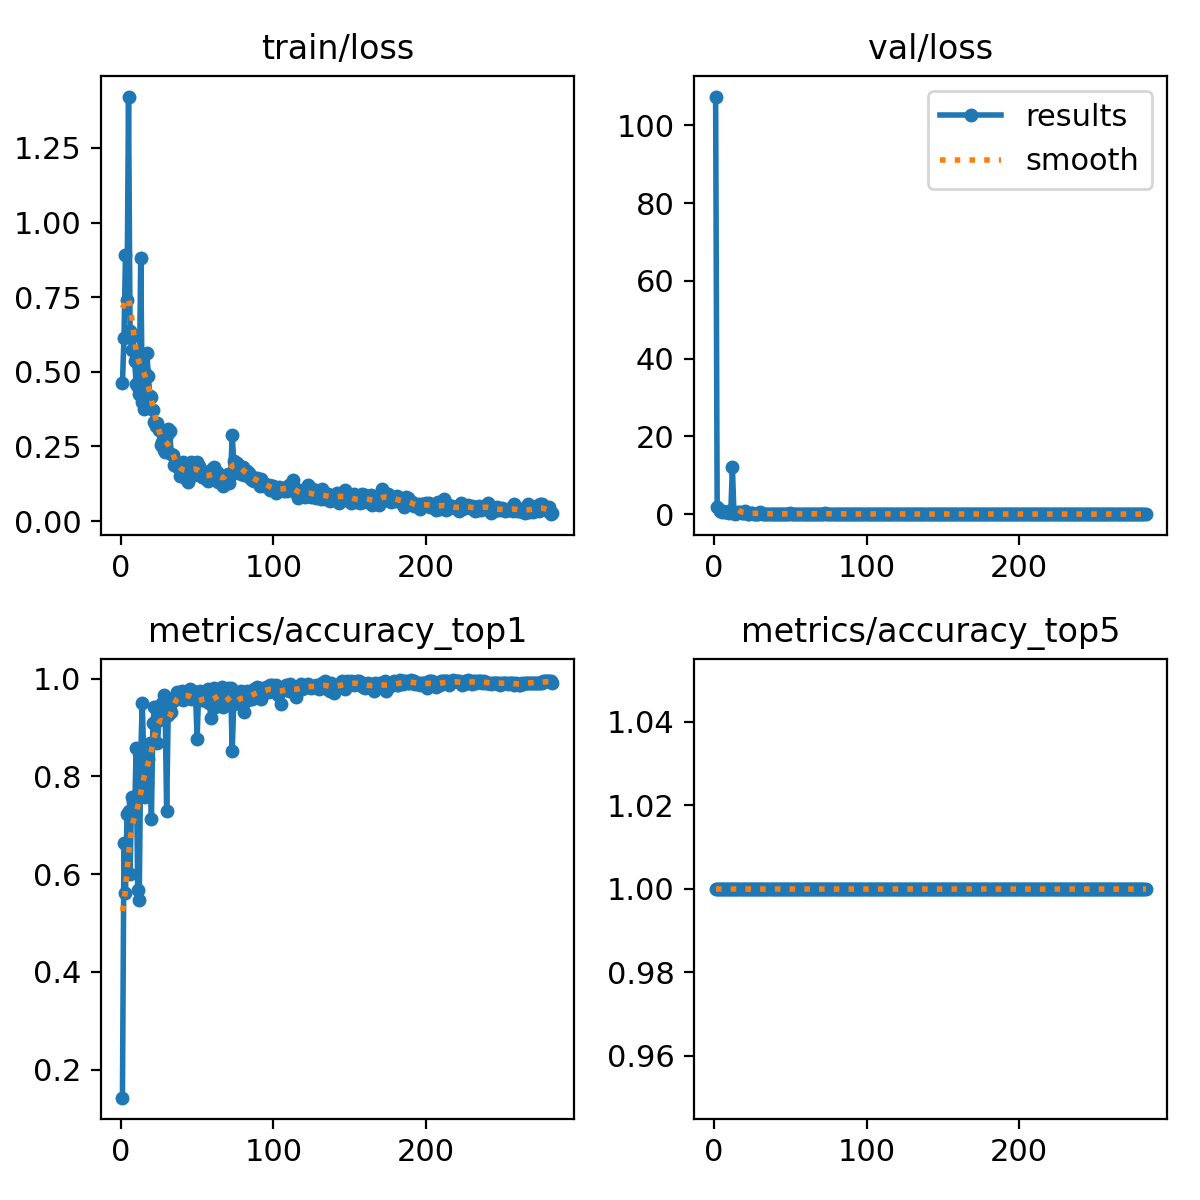

In [15]:
Image("/kaggle/working/runs/classify/pepper_cls_model/results.png", width=600)

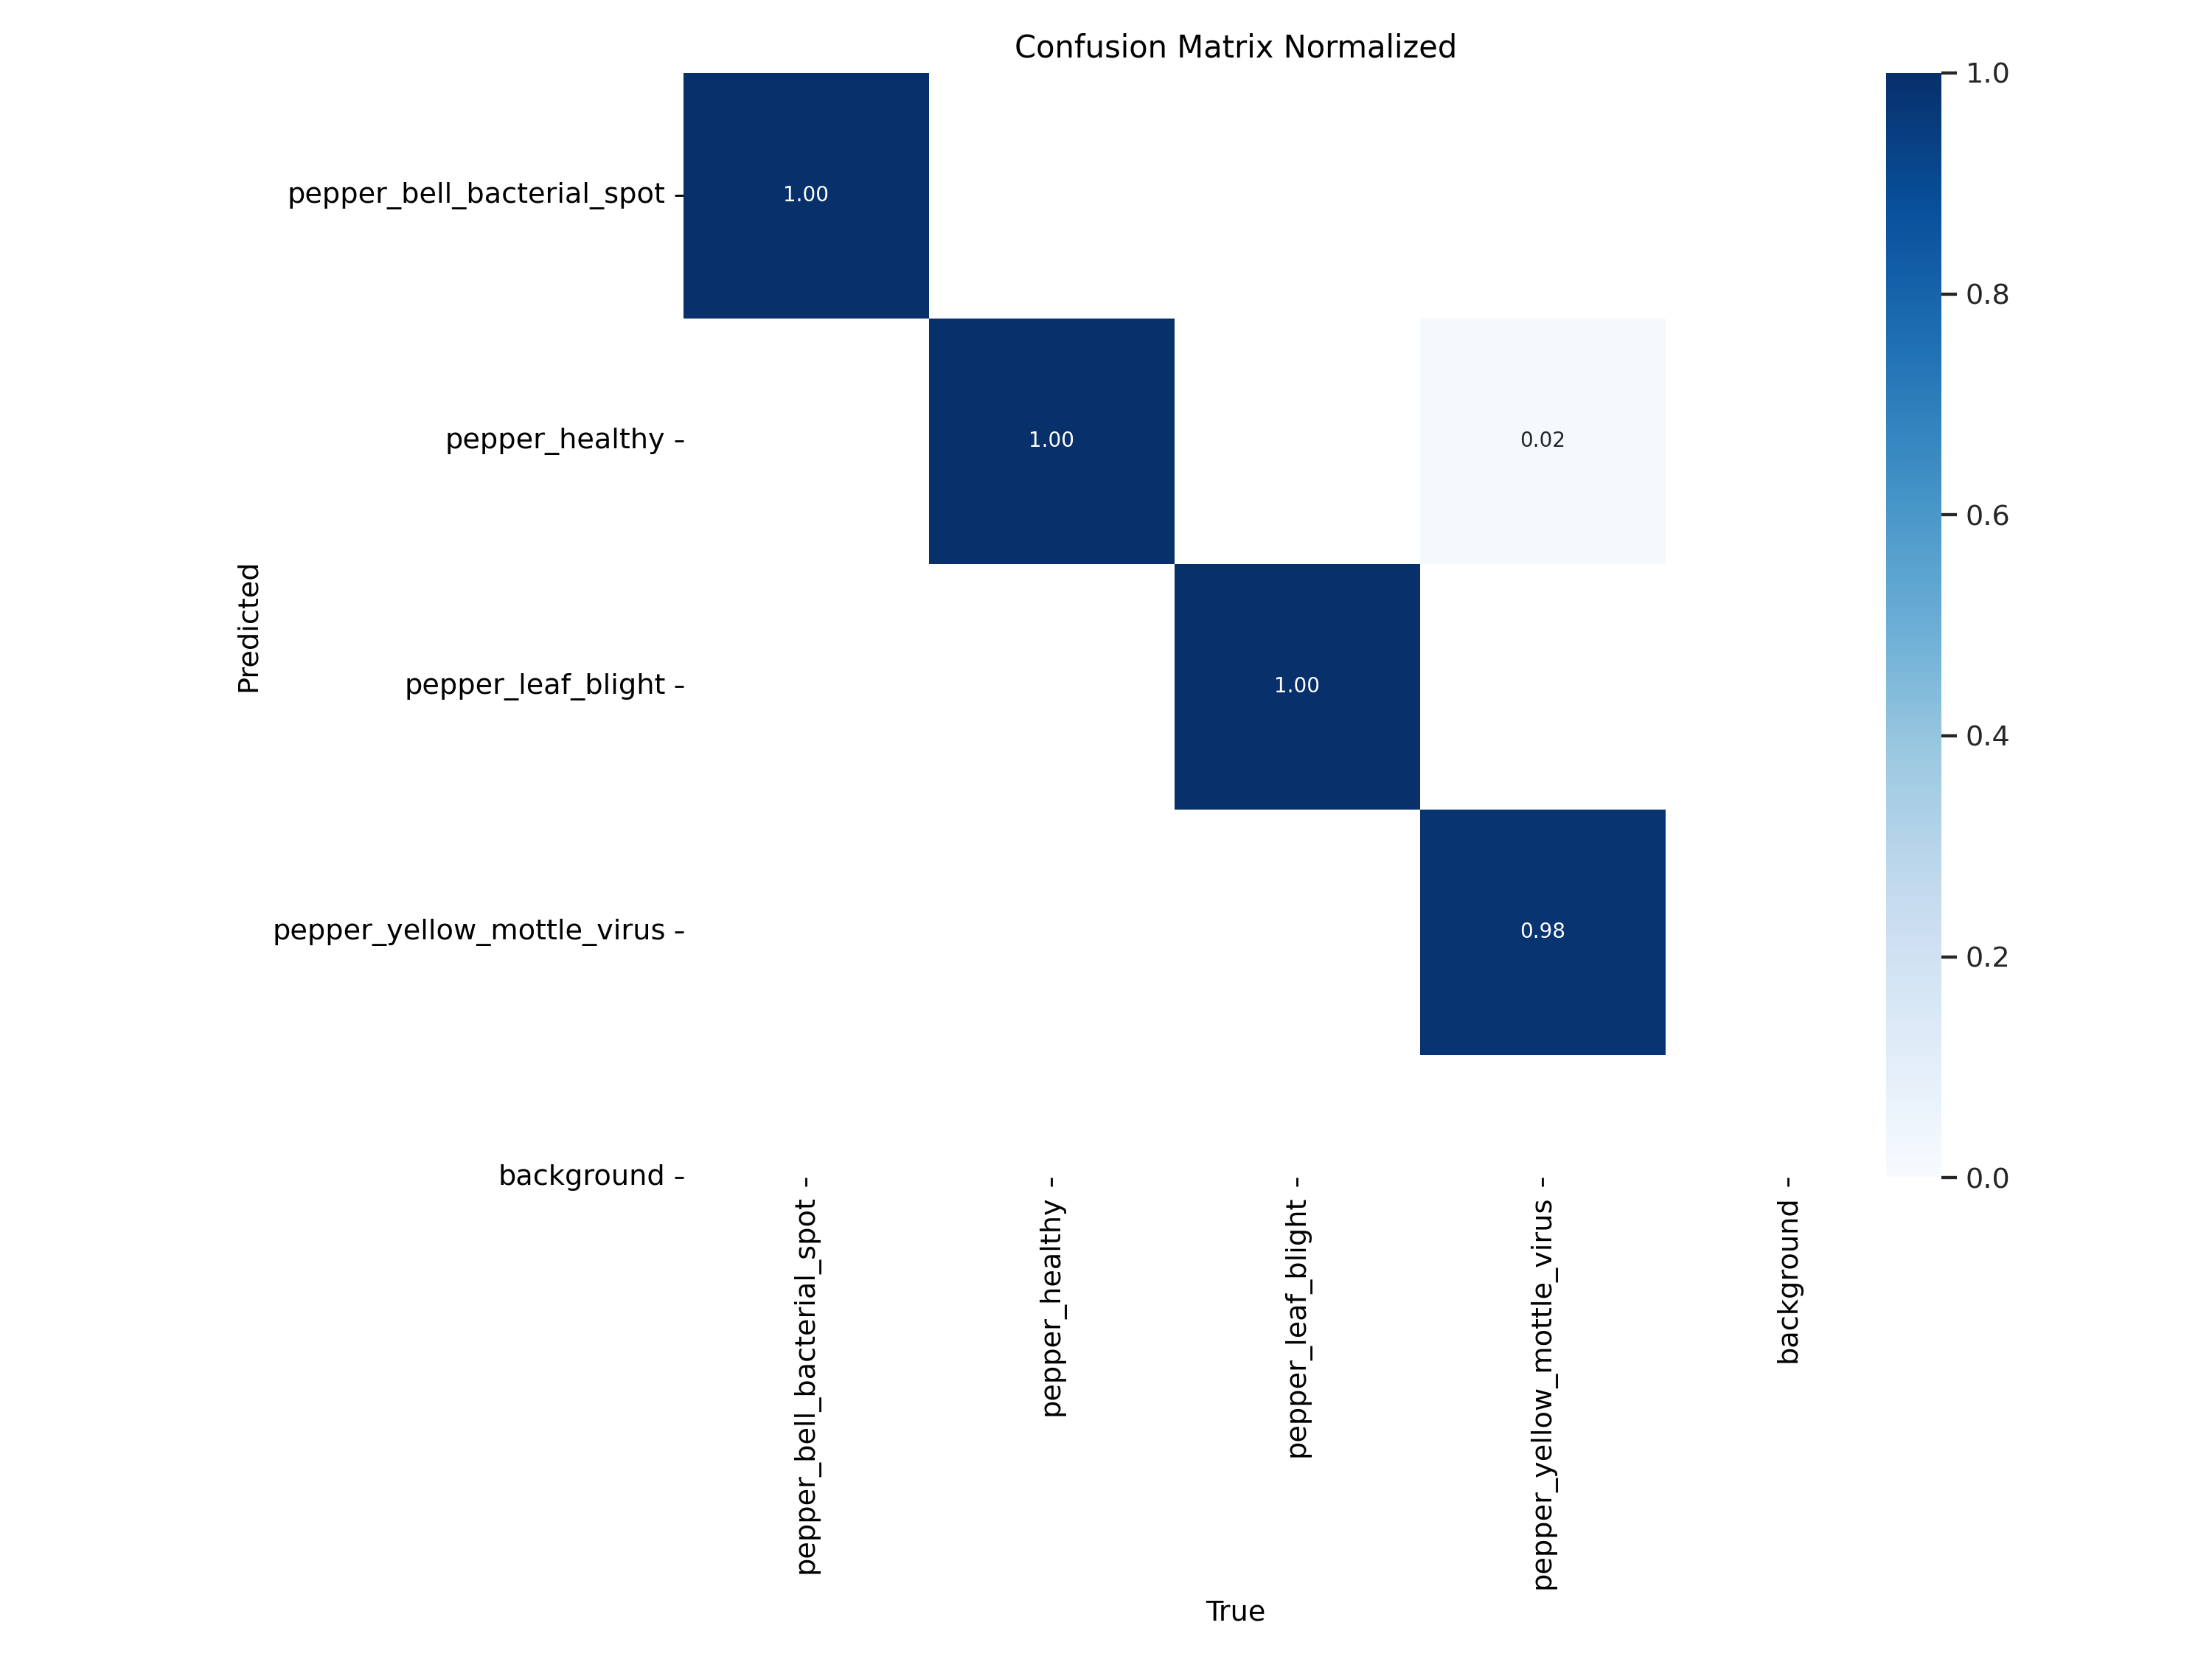

In [16]:
Image("/kaggle/working/runs/classify/pepper_cls_model/confusion_matrix_normalized.png", width=600)